In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import keras
import tensorflow as tf
import tensorflow_hub as hub

In [18]:
%cd dataset/apples
!unzip apples.zip

/content/dataset/apples
Archive:  apples.zip
replace 1F-fgyxhr1s8FWNsSj1O3vw.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 1F-fgyxhr1s8FWNsSj1O3vw.jpeg  
  inflating: 6fbf7d10038ec3186b648b9a1f219573def7da08_FruitsandVegetables_29896_01.jpg  
  inflating: 9e5520e5d3932fbe4b6362fa66d04069.jpg  
  inflating: 38bfd87be9248cc9fa0abc775cef3c50.jpg  
  inflating: 51kO14HzkzL._AC_UF10001000_QL80_.jpg  
  inflating: 54f93200ecc09_-_apple-red-flesh-590.jpg  
  inflating: 81aRkv2DltL._AC_UF10001000_QL80_.jpg  
  inflating: 319J7YpfyNL._AC_UF10001000_QL80_.jpg  
  inflating: 1000_F_138358313_26XjUJlN4q8IcZY6VKd6CvCfeBiVs97k.jpg  
  inflating: 1000_F_176979696_hqfioFYq7pX13dmiu9ENrpsHZy1yM3Dt.jpg  
  inflating: 1000_F_194152773_lF0xxlrclLpJi2FCoRCmXTsoS3pwJaDv.jpg  
  inflating: 1000_F_210597040_wxyvT8wGl322pfG6xO4LGW4FCWTgkOyX.jpg  
  inflating: 1130px-Red_Apple.jpg    
  inflating: 2011.png                
  inflating: 3584.jpg                
  inflating: 5695.jpg                
 

In [19]:
#quantity of images
!ls /content/dataset/apples | wc -l #494

494


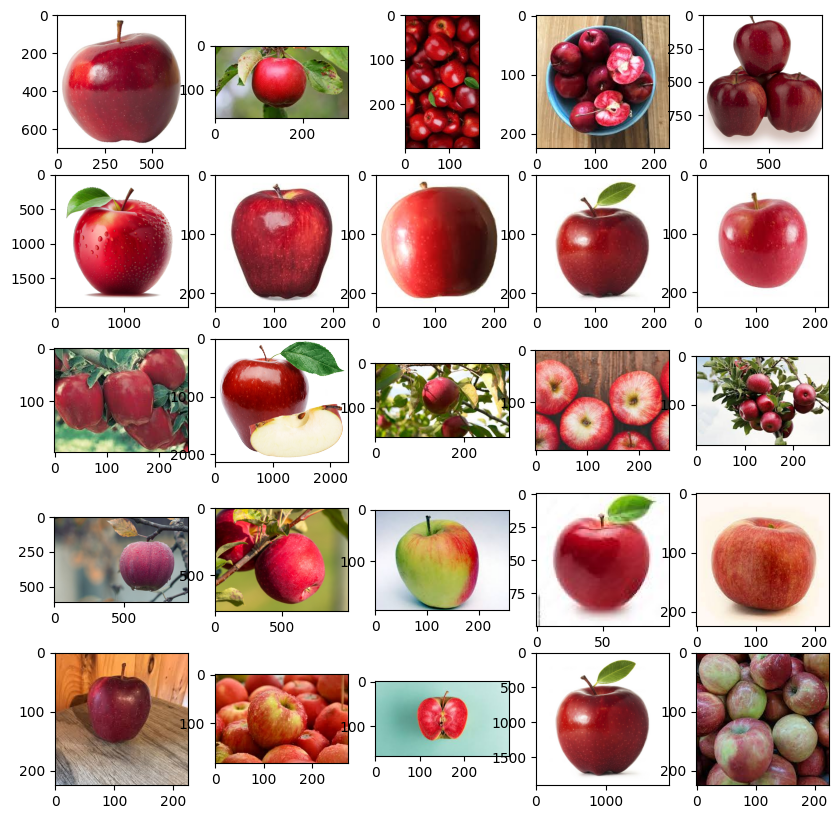

In [20]:
plt.figure(figsize=(10,10))

carpet = '/content/dataset/apples'
images = os.listdir(carpet)

for i, nameimg in enumerate(images[:25]):
    plt.subplot(5,5,i +1)
    imagen = mpimg.imread(carpet + '/' + nameimg)
    plt.imshow(imagen)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#create dataset
datagen = ImageDataGenerator(
    rescale= 1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split =0.2
)

In [22]:
data_gen_ent = datagen.flow_from_directory('/content/dataset/', target_size=(224,224),
                                           batch_size=32, shuffle=True, subset='training')
data_gen_pru = datagen.flow_from_directory('/content/dataset/', target_size=(224,224),
                                           batch_size=32, shuffle=True, subset='validation')

Found 395 images belonging to 1 classes.
Found 98 images belonging to 1 classes.


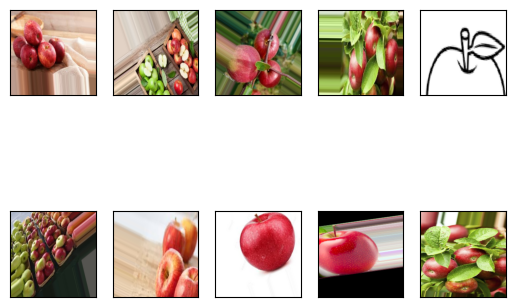

In [23]:
for imagen, etiqueta in data_gen_ent:
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i])
    break
plt.show()

In [24]:
url = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-224-feature-vector/versions/2"

mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3), trainable=False,  arguments=dict(batch_norm_momentum=0.997))

In [25]:
model = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              410208    
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 411489 (1.57 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 410208 (1.56 MB)
_________________________________________________________________


In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
epochs = 75

historial = model.fit(
    data_gen_ent, epochs=epochs, batch_size=32,
    validation_data=data_gen_pru
)

Epoch 1/75


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


13/13 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.9342

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 [==============================] - 16s 830ms/step - loss: 0.0000e+00 - accuracy: 0.9342 - val_loss: 0.0000e+00 - val_accuracy: 0.9286
Epoch 2/75
13/13 [==============================] - 10s 740ms/step - loss: 0.0000e+00 - accuracy: 0.9316 - val_loss: 0.0000e+00 - val_accuracy: 0.9490
Epoch 3/75
13/13 [==============================] - 10s 782ms/step - loss: 0.0000e+00 - accuracy: 0.9544 - val_loss: 0.0000e+00 - val_accuracy: 0.9388
Epoch 4/75
13/13 [==============================] - 10s 779ms/step - loss: 0.0000e+00 - accuracy: 0.9519 - val_loss: 0.0000e+00 - val_accuracy: 0.9388
Epoch 5/75
13/13 [==============================] - 9s 675ms/step - loss: 0.0000e+00 - accuracy: 0.9544 - val_loss: 0.0000e+00 - val_accuracy: 0.9286
Epoch 6/75
13/13 [==============================] - 8s 666ms/step - loss: 0.0000e+00 - accuracy: 0.9519 - val_loss: 0.0000e+00 - val_accuracy: 0.9694
Epoch 7/75
13/13 [==============================] - 9s 735ms/step - loss: 0.0000e+00 - accuracy: 0.9468 - v

In [34]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = model.predict(img.reshape(-1, 224,224,3))

  return np.argmax(prediccion[0], axis=-1)

In [45]:
url = '1000_F_138358313_26XjUJlN4q8IcZY6VKd6CvCfeBiVs97k.jpg'
prediccion = categorizar(url)


print(prediccion)

IndexError: tuple index out of range